In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns

In [2]:
user_dataset_path = "../data/users_train.csv"
user_dataset = pd.read_csv(
    user_dataset_path,
    index_col=0,
    parse_dates=["user_first_engagement"],
)

In [3]:
CATEGORICAL_COL = ["country_name", "device_os", "device_lang"]
NUMERICAL_COL = [
    "cnt_user_engagement",
    "cnt_level_start_quickplay",
    "cnt_level_end_quickplay",
    "cnt_level_complete_quickplay",
    "cnt_level_reset_quickplay",
    "cnt_post_score",
    "cnt_spend_virtual_currency",
    "cnt_ad_reward",
    "cnt_challenge_a_friend",
    "cnt_completed_5_levels",
    "cnt_use_extra_steps",
]
LABEL_COL = "churned"

# Data Validation

In [4]:
user_dataset.dtypes

user_pseudo_id                  object
country_name                    object
device_os                       object
device_lang                     object
cnt_user_engagement              int64
cnt_level_start_quickplay        int64
cnt_level_end_quickplay          int64
cnt_level_complete_quickplay     int64
cnt_level_reset_quickplay        int64
cnt_post_score                   int64
cnt_spend_virtual_currency       int64
cnt_ad_reward                    int64
cnt_challenge_a_friend           int64
cnt_completed_5_levels           int64
cnt_use_extra_steps              int64
churned                          int64
dtype: object

In [5]:
user_dataset[CATEGORICAL_COL].isnull().sum()

country_name      3
device_os       204
device_lang       0
dtype: int64

In [6]:
user_dataset[NUMERICAL_COL].isnull().sum()

cnt_user_engagement             0
cnt_level_start_quickplay       0
cnt_level_end_quickplay         0
cnt_level_complete_quickplay    0
cnt_level_reset_quickplay       0
cnt_post_score                  0
cnt_spend_virtual_currency      0
cnt_ad_reward                   0
cnt_challenge_a_friend          0
cnt_completed_5_levels          0
cnt_use_extra_steps             0
dtype: int64

# Pandas Profiling

In [7]:
profile = ProfileReport(user_dataset, title="Pandas Profiling Report", explorative=True)

profile.to_widgets()

Summarize dataset:   0%|          | 0/30 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

# EDA
## temporal evolution

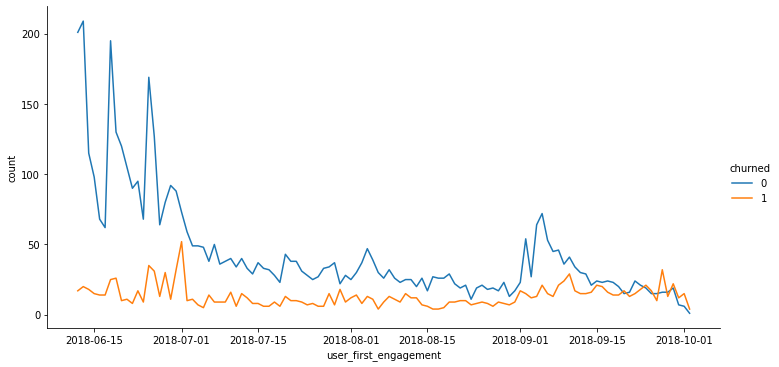

In [44]:
data_plot = (
    user_dataset.groupby(LABEL_COL)[LABEL_COL]
    .resample("D")
    .count()
    .rename("count")
    .reset_index()
)
sns.relplot(
    data=data_plot,
    x="user_first_engagement",
    y="count",
    hue=LABEL_COL,
    kind="line",
    height=5,
    aspect=2
)

## 

In [86]:
user_dataset.loc[selector,:].dropna()

,user_pseudo_id,country_name,device_os,device_lang,cnt_user_engagement,cnt_level_start_quickplay,cnt_level_end_quickplay,cnt_level_complete_quickplay,cnt_level_reset_quickplay,cnt_post_score,cnt_spend_virtual_currency,cnt_ad_reward,cnt_challenge_a_friend,cnt_completed_5_levels,cnt_use_extra_steps,churned
user_first_engagement,,,,,,,,,,,,,,,,


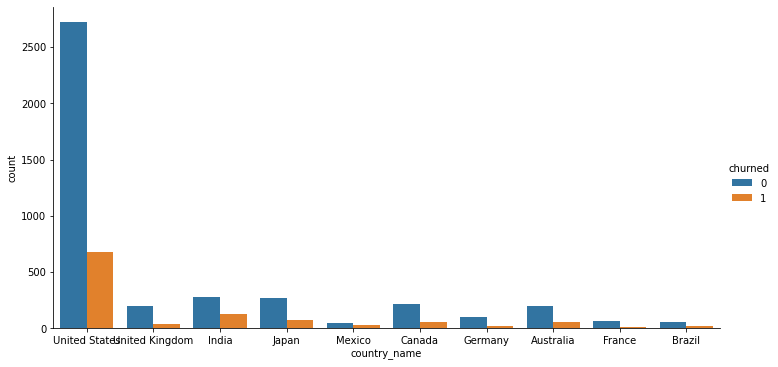

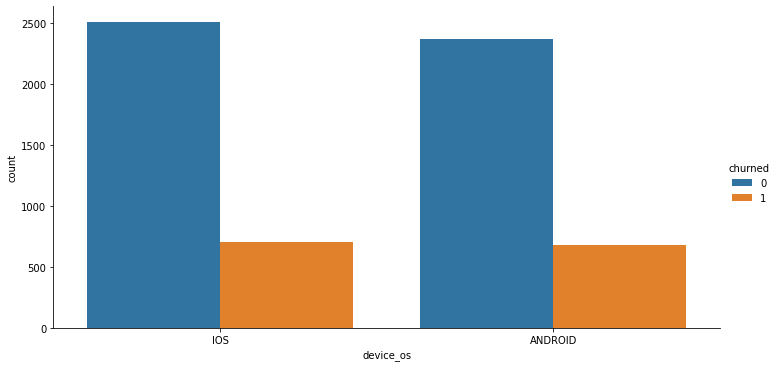

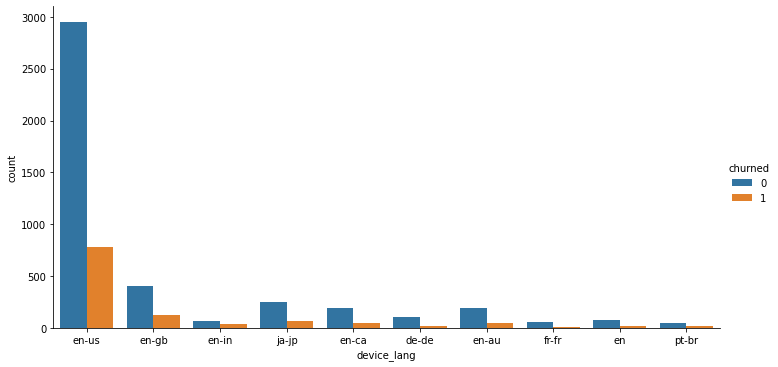

In [88]:
for cat_col in CATEGORICAL_COL:
    selector = user_dataset[cat_col].isin(user_dataset[cat_col].value_counts().iloc[:10].index.to_list())
    sns.catplot(
        x=cat_col,
        hue=LABEL_COL,
        #col_wrap=4,
        data=user_dataset.loc[selector,:].dropna(),
        kind="count",
        height=5,
        aspect=2,
    )

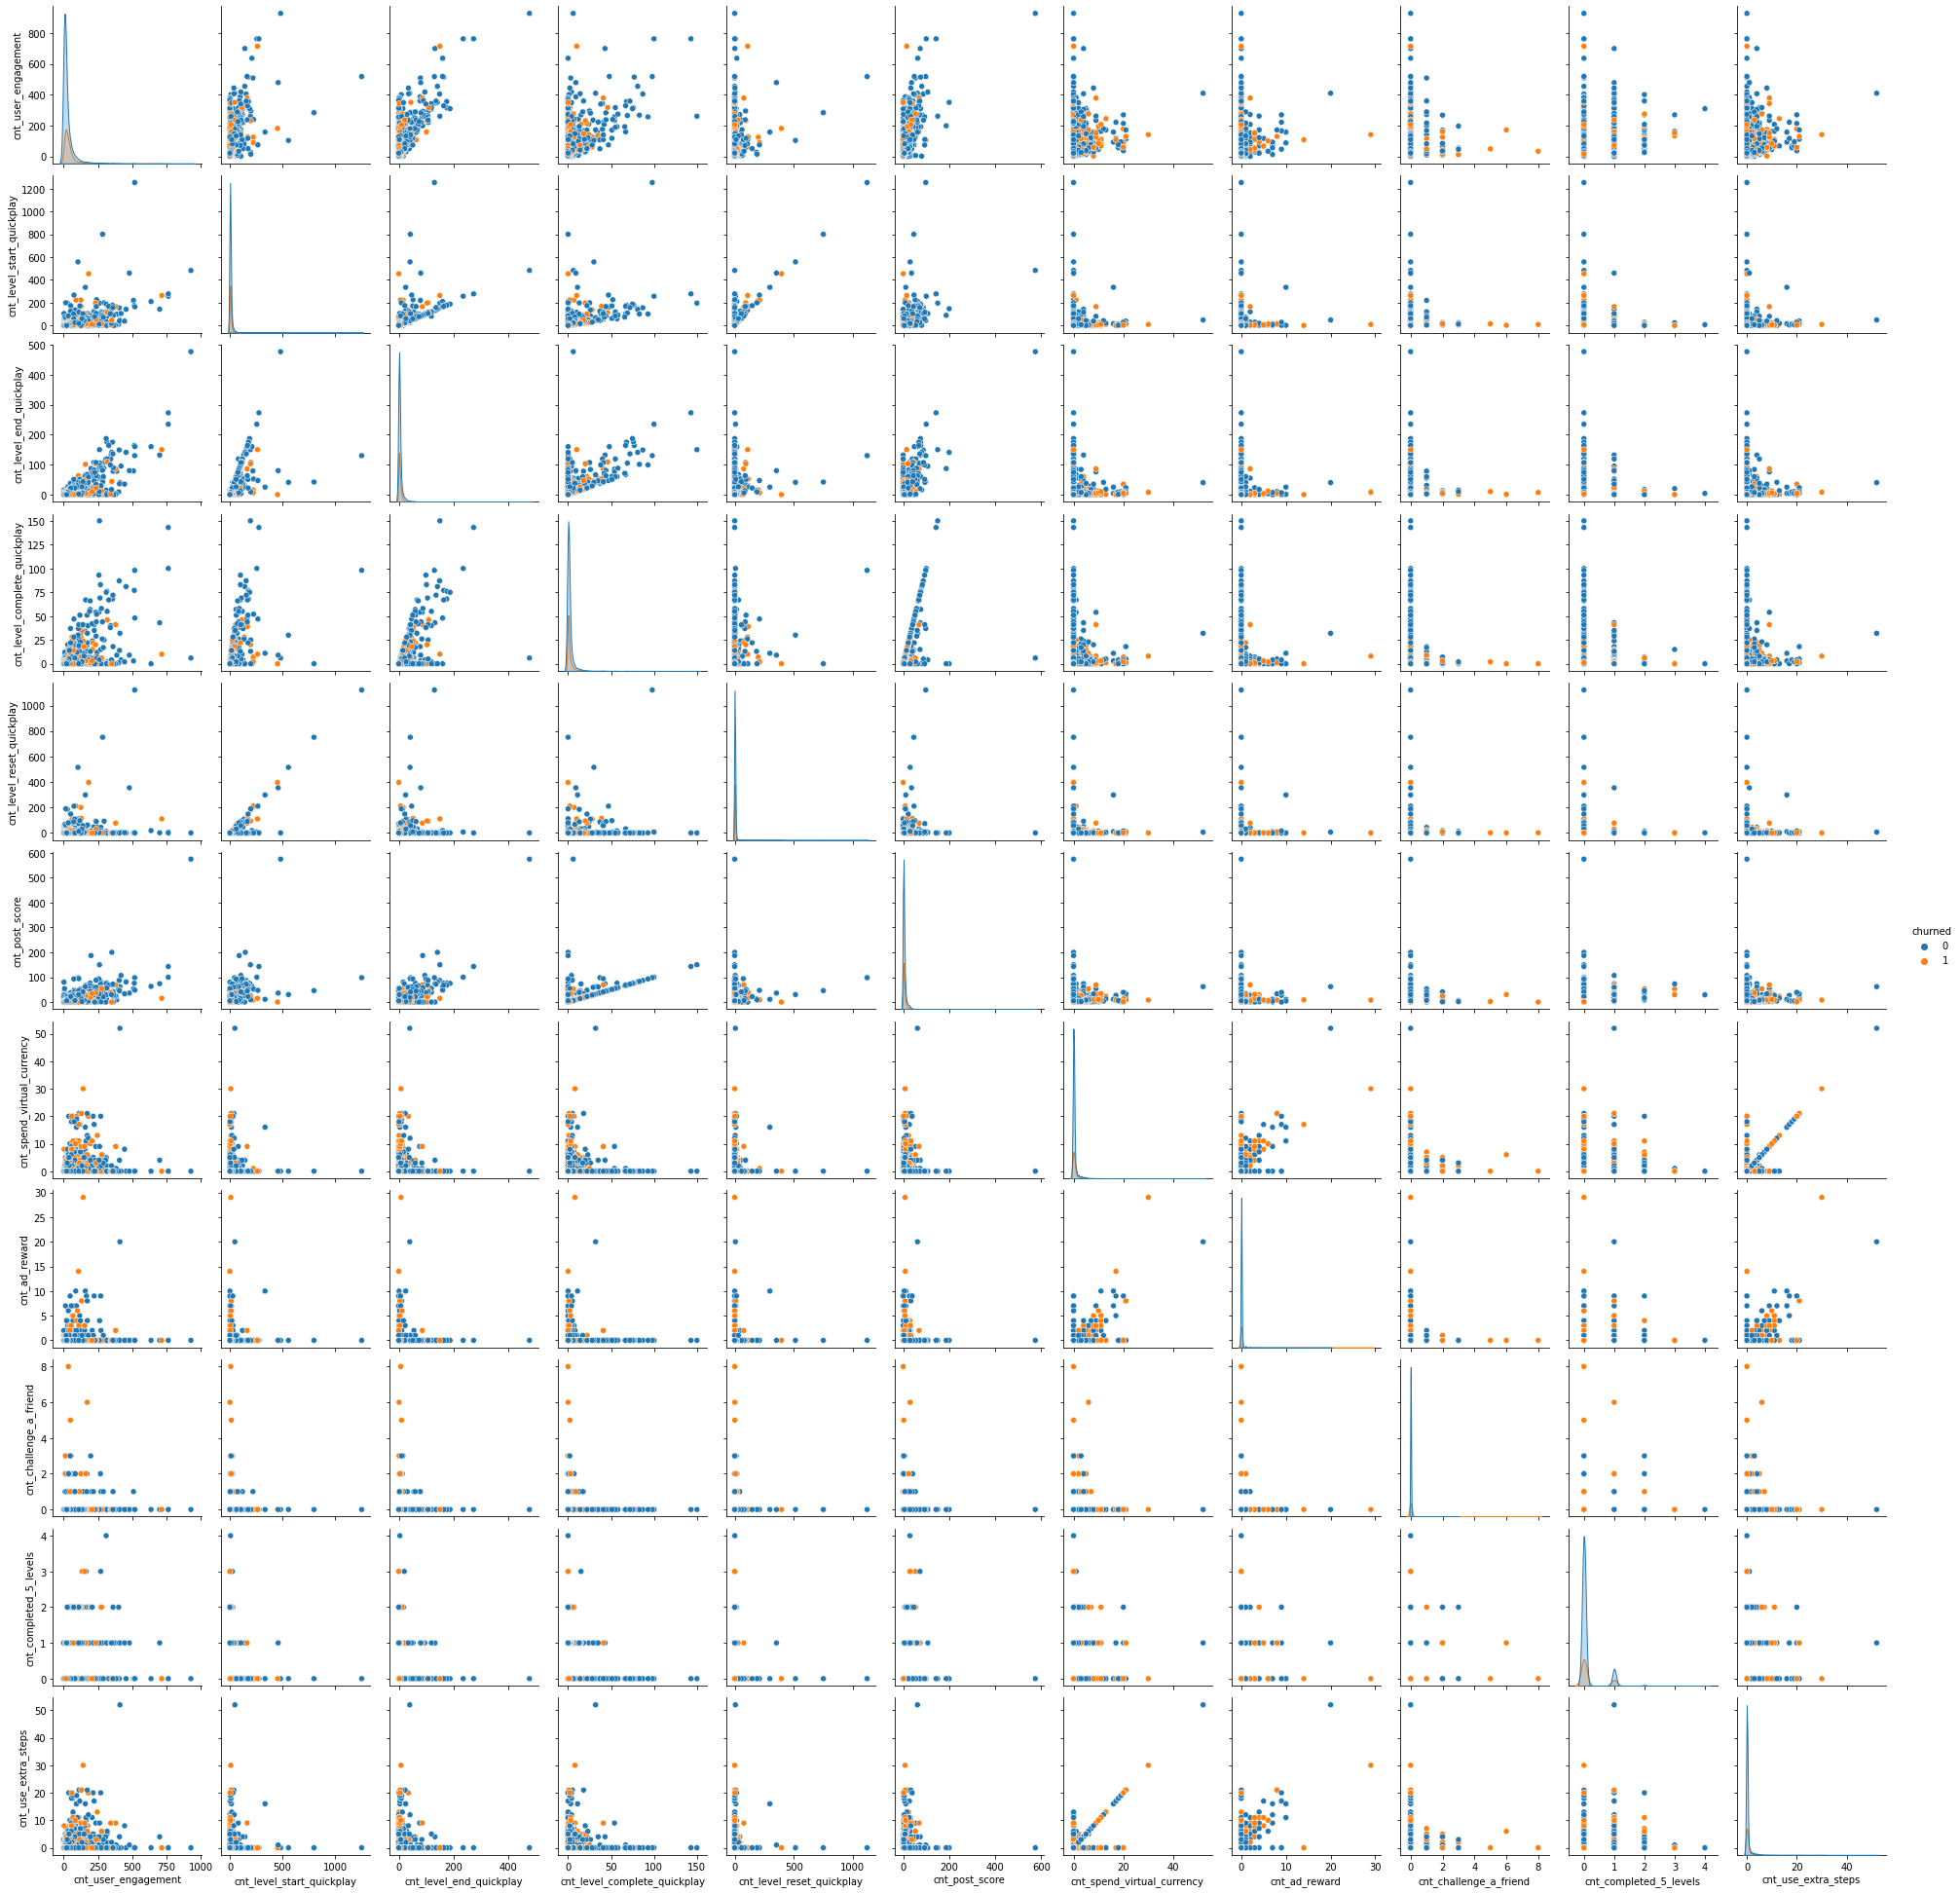

In [90]:
sns.pairplot(data=user_dataset[NUMERICAL_COL+[LABEL_COL]], hue=LABEL_COL)
